# Classification of Reuters news data through Neural Networks

This program develops a neural network model to classify Reuters newswires into 46 different mutually-exclusive topics. Each sample (news) belongs to one and only one category. 


In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


The words in the train and test datasets are already encoded into numbers. Each sample is a list of integers (word indices), thus has a different length. 

We can decode them back to words. Decode the 10th training sample.

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[9]])
decoded_newswire

557056/550378 [==============================] - 0s 0us/step


'? lt aramco corp has accepted japanese ? to lift a higher proportion of arab heavy crude oil under term contracts in july oil industry sources said japanese companies requested a ratio of 80 pct arab heavy to 20 pct arab light under a term contract agreement with aramco for 100 000 barrels per day the sources said the contractual ratio is 30 pct heavy crude to 70 pct light japanese demand for heavy crude oil has increased substantially since the all japan ? union ceased ? into the northern mideast gulf last month causing problems with liftings of heavy kuwait and ? crudes reuter 3'

This particular news belongs to category 16 (out of 46 categories).

In [4]:
train_labels[9]

16

 code to see how many samples are in the train and test sets.

In [5]:
print("Number of samples in training set : "+ str(len(train_data)))
print("Number of samples in test set : "+ str(len(test_data)))

Number of samples in training set : 8982
Number of samples in test set : 2246


Number of samples in training set : 8982

Number of samples in test set : 2246

Vectorizing the train and test data using the 'one-hot-encoding' approach.

In [6]:
import numpy as np
#one-hot encoding of our data
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) #creating vector of size 10,000(no. of examples) x 10000(size of dictionary) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Vectorizing the train and test labels the way it is appropriate for multi-class single-label classification.

In [7]:
# Our vectorized labels
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
#labels converted into numpy array with the categorical format as we need to classify the ouput as one of the 46 categories

Developing an MLP with 2 hidden layers, each having 64 neurons with ReLU activation function. Also, include the appropriate output layer based on the classification task in hand.

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

Compiling the model. Using RMSProp optimizer with appropriate loss function, and follow the accuracy metric during training.

In [9]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Shuffling and setting apart 1,000 samples in the training data to use as a validation set. 

In [10]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Training the model for 20 epochs and use batches of size 512. Also, monitoring the performance of the model on the validation set during training. Reporting the training and validation accuracy. 

In [11]:
history_model1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.6248 - accuracy: 0.4995 - val_loss: 1.7695 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4211 - accuracy: 0.7137 - val_loss: 1.3890 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0535 - accuracy: 0.7786 - val_loss: 1.2478 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8301 - accuracy: 0.8267 - val_loss: 1.1548 - val_accuracy: 0.7410
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6597 - accuracy: 0.8623 - val_loss: 1.1094 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5247 - accuracy: 0.8934 - val_loss: 1.0526 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4210 - accuracy: 0.9178 - val_loss: 1.0671 - val_accuracy: 0.7870
Epoch 8/20
16

Evaluating the model on test set and report the test accuracy. Also, predicting the class for the first sample in the test set.

In [56]:
# Evaluate the model on the test set
results = model1.evaluate(x_test, y_test)

predictions = model1.predict(x_test, batch_size=64)

print("Class for the first sample: "+ str(predictions[0].argmax()))

71/71 [==============================] - 0s 3ms/step - loss: 1.2418 - accuracy: 0.7850
Class: 3


With the original model the accuracy achieved is 77.69% on the test data.

 Using `model.summary()` to see how many trainable parameters your neural network model has. 

In [57]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________



The number of parameters in the two hidden layers are **640064** and **4160**. The number of parameters in the output layer are **2990** 

**Number of parameters = Number of weights(from inputs) x Number of  neurons + Number of biases(from each neuron)**

Therefore

In the first layer we have = 10000 x 64 + 64 = 640064 parameters 

since the output from first layer becomes the input for the second layer

In the second layer we have = 64 x 64 + 64 = 4160 parameters 

similarly in the output layer = 64 x 46 + 46 = 2990 parameters

 Plotting the training and validation loss. Plotting the training and validation accuracy. 

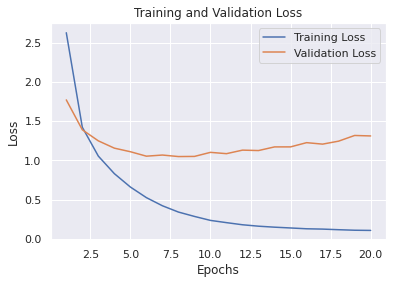

In [58]:
# Seaborn is a Python data visualization library based on matplotlib. 
# We use the default default seaborn theme, scaling, and color palette.
import seaborn as sns
sns.set()

train_acc1  = history_model1.history['accuracy']
train_loss1 = history_model1.history['loss']
val_acc1  = history_model1.history['val_accuracy']
val_loss1 = history_model1.history['val_loss']

epochs = range(1, len(train_acc1) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The training loss keeps on decreasing almost touching zero around 20 epochs, whereas the validation loss does not change much significantly after 5 epochs.

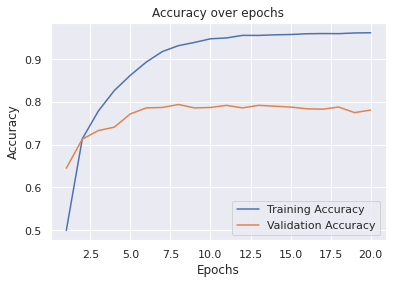

In [59]:
plt.title(label = 'Accuracy over epochs')
plt.plot(epochs, train_acc1, label = 'Training Accuracy')
plt.plot(epochs, val_acc1, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

After 5 epochs the Training accuracy kept on increasing moving towards 100% after 15 epochs, whereas the Validation accuracy became almost constant after 5 epochs. 

The Tranining loss becoming smaller with increasing epochs and the Training accuracy kept on increasing almost touching a 100%. Although the Validation loss stopped decreasing and the Validation accuracy stopped improving after 5 epochs. This is indicative of **Overfitting** of the model on the training data. The model is performing very well on the training dataset as compared to the validation dataset. On the training data after 20 epochs the model achieves around 95% accuracy as compared to test data where it achieves only around 77% accuracy.

Trying to improve the performance of your model using regularization methods. Trying early stopping, a smaller (8 neurons per hidden layer) and a larger (256 neurons per hidden layer) network, L2 weight regularization (alpha=0.001), and dropout (p=0.1). Making sure to evaluate each model on the validation set, providing plots that help compare performance of alternative models, and interpreting those plots. Eventually, picking one model as the final model.

# Using Early Stopping 

In [60]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model2 = model2.fit(partial_x_train,
                            partial_y_train,
                            epochs=7,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/7
16/16 [==============================] - 1s 52ms/step - loss: 2.6124 - accuracy: 0.5338 - val_loss: 1.7971 - val_accuracy: 0.6690
Epoch 2/7
16/16 [==============================] - 1s 45ms/step - loss: 1.4416 - accuracy: 0.7159 - val_loss: 1.3988 - val_accuracy: 0.7110
Epoch 3/7
16/16 [==============================] - 1s 44ms/step - loss: 1.0591 - accuracy: 0.7821 - val_loss: 1.2511 - val_accuracy: 0.7380
Epoch 4/7
16/16 [==============================] - 1s 44ms/step - loss: 0.8271 - accuracy: 0.8251 - val_loss: 1.1811 - val_accuracy: 0.7540
Epoch 5/7
16/16 [==============================] - 1s 44ms/step - loss: 0.6493 - accuracy: 0.8652 - val_loss: 1.1046 - val_accuracy: 0.7800
Epoch 6/7
16/16 [==============================] - 1s 43ms/step - loss: 0.5126 - accuracy: 0.8959 - val_loss: 1.0861 - val_accuracy: 0.7830
Epoch 7/7
16/16 [==============================] - 1s 42ms/step - loss: 0.4084 - accuracy: 0.9158 - val_loss: 1.0558 - val_accuracy: 0.7860


In [61]:
# Evaluate the model on the test set
results = model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9613 - accuracy: 0.7809


On stopping the model earlier by running it to 7 epochs the accuracy achieved for the test set is 78.27% which is comparable to the 77.67% of that of the original model that was run for 20 epochs.

Plotting the Training and the validation loss 

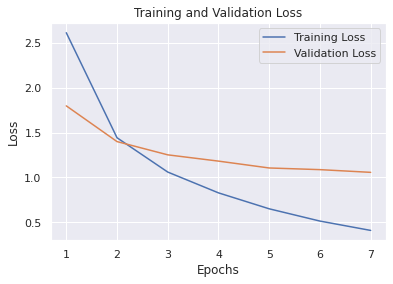

In [62]:
train_acc2  = history_model2.history['accuracy']
train_loss2 = history_model2.history['loss']
val_acc2  = history_model2.history['val_accuracy']
val_loss2 = history_model2.history['val_loss']

epochs = range(1, len(train_acc2) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss2, label = 'Training Loss')
plt.plot(epochs, val_loss2, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The difference between the training loss and the validation loss keeps on widening after 2 epochs 

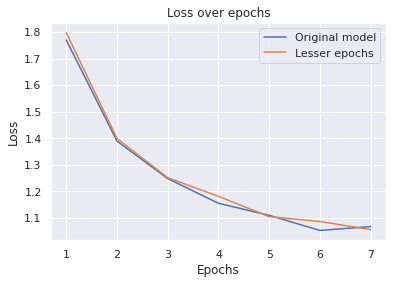

In [63]:
plt.title(label = 'Loss over epochs')
plt.plot(epochs, val_loss1[:7], label = 'Original model')
plt.plot(epochs, val_loss2, label = 'Lesser epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Since the model is the same and the only difference is that the number of epochs is lesser as compared to the original model, so we see the validation loss from this model following the loss from the original model very closely. Even though both these models are similar, the model run on lesser epochs appears to be doing slighltly better. 

# By using a smaller neural network

In [64]:
model3 = models.Sequential()
#decreasing the number of neurons in the hidden layers to 8 
model3.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model3 = model3.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 3.6844 - accuracy: 0.1262 - val_loss: 3.5099 - val_accuracy: 0.2940
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 3.3739 - accuracy: 0.3130 - val_loss: 3.2031 - val_accuracy: 0.3140
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 3.0504 - accuracy: 0.3011 - val_loss: 2.8938 - val_accuracy: 0.2560
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 2.7351 - accuracy: 0.2950 - val_loss: 2.6171 - val_accuracy: 0.3370
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 2.4624 - accuracy: 0.4538 - val_loss: 2.3939 - val_accuracy: 0.5250
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 2.2354 - accuracy: 0.5403 - val_loss: 2.2066 - val_accuracy: 0.5480
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 2.0391 - accuracy: 0.5585 - val_loss: 2.0503 - val_accuracy: 0.5640
Epoch 8/20
16

In [65]:
# Evaluate the model on the test set
results = model3.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.3433 - accuracy: 0.6919


By using a smaller neural network with 8 neurons in the hidden layers each the model has an accuracy of 70.35% on the test data


Plotting the Training and the validation loss 

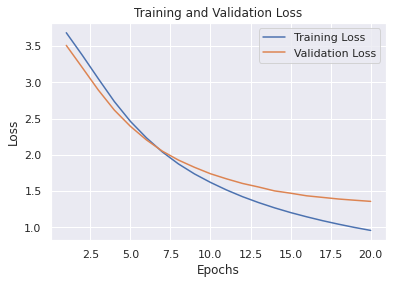

In [66]:
train_acc3  = history_model3.history['accuracy']
train_loss3 = history_model3.history['loss']
val_acc3  = history_model3.history['val_accuracy']
val_loss3 = history_model3.history['val_loss']

epochs = range(1, len(train_acc3) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss3, label = 'Training Loss')
plt.plot(epochs, val_loss3, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The training and validation loss do no appear to be very different from one another.

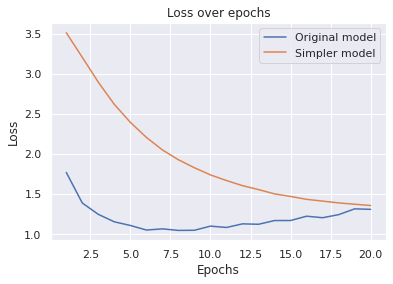

In [67]:
plt.title(label = 'Loss over epochs')
plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss3, label = 'Simpler model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The model shows a sharp decline in tthe validation loss as compared to the original model. It also does not show any stark sign of overfitting as the graph does not appeart to be increasing at any point. Though the accuracy of this model is very low (around 71%) as compared to the original model.

# Using Larger neural network 

In [68]:
model4 = models.Sequential()
#increasing the number of neurons in the hidden layers to 256
model4.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_model4 = model4.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 130ms/step - loss: 2.0062 - accuracy: 0.5749 - val_loss: 1.3264 - val_accuracy: 0.7200
Epoch 2/20
16/16 [==============================] - 2s 122ms/step - loss: 0.9442 - accuracy: 0.7907 - val_loss: 1.1078 - val_accuracy: 0.7750
Epoch 3/20
16/16 [==============================] - 2s 123ms/step - loss: 0.5983 - accuracy: 0.8703 - val_loss: 1.0179 - val_accuracy: 0.7910
Epoch 4/20
16/16 [==============================] - 2s 122ms/step - loss: 0.4153 - accuracy: 0.9112 - val_loss: 1.0400 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 2s 124ms/step - loss: 0.2719 - accuracy: 0.9437 - val_loss: 1.0339 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 2s 131ms/step - loss: 0.2119 - accuracy: 0.9498 - val_loss: 1.1159 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 2s 133ms/step - loss: 0.1938 - accuracy: 0.9504 - val_loss: 1.0849 - val_accuracy: 0.8010
Epoch 

In [69]:
# Evaluate the model on the test set
results = model4.evaluate(x_test, y_test)

71/71 [==============================] - 0s 6ms/step - loss: 1.3166 - accuracy: 0.7867


With a larger number of neurons(256) in the hidden layers each the model is able to achieve 78.81% accuracy on the test set

Plotting the Training and Validation Loss

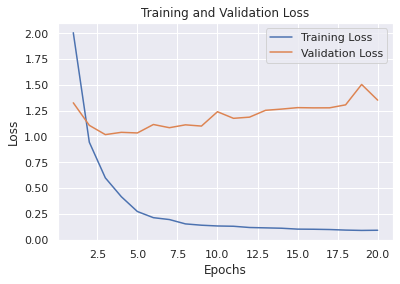

In [70]:
train_acc4  = history_model4.history['accuracy']
train_loss4 = history_model4.history['loss']
val_acc4  = history_model4.history['val_accuracy']
val_loss4 = history_model4.history['val_loss']

epochs = range(1, len(train_acc4) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss4, label = 'Training Loss')
plt.plot(epochs, val_loss4, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The difference validation and the training loss appear to be increasing after 2.5 epochs. The validation loss keeps on increasing whereas the Training loss keeps on decreasing which is indicative of overfitting of the model on the training data. 

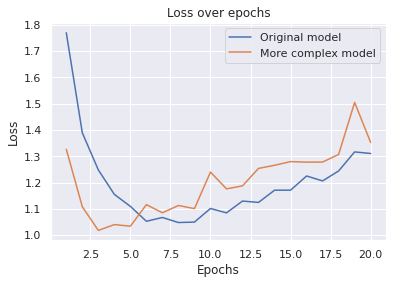

In [71]:
plt.title(label = 'Loss over epochs')
plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss4, label = 'More complex model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The more complex model performs better than the original model until 6 epochs after which the validation loss from it starts performing worse than the original model. 

# Using L2 weight regularization 

In [72]:
from tensorflow.keras import regularizers

model5 = models.Sequential()
model5.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))

model5.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['acc'])

history_model5 = model5.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))  

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.7003 - acc: 0.5550 - val_loss: 1.8514 - val_acc: 0.6580
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5350 - acc: 0.7147 - val_loss: 1.5298 - val_acc: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.2167 - acc: 0.7734 - val_loss: 1.4094 - val_acc: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0279 - acc: 0.8148 - val_loss: 1.3247 - val_acc: 0.7470
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8991 - acc: 0.8444 - val_loss: 1.2773 - val_acc: 0.7620
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8017 - acc: 0.8696 - val_loss: 1.2571 - val_acc: 0.7630
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.7226 - acc: 0.8908 - val_loss: 1.2369 - val_acc: 0.7790
Epoch 8/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6667 - a

In [73]:
# Evaluate the model on the test set
results = model5.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1516 - acc: 0.7850


Using L2 weight regularization method the model is able to achieve a 79.12% accuracy on the test set

Plotting the training and validation loss

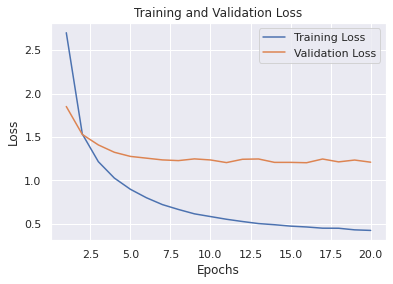

In [74]:
train_acc5  = history_model5.history['acc']
train_loss5 = history_model5.history['loss']
val_acc5  = history_model5.history['val_acc']
val_loss5 = history_model5.history['val_loss']

epochs = range(1, len(train_acc5) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss5, label = 'Training Loss')
plt.plot(epochs, val_loss5, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The difference validation and the trainig loss starts increasing after 2.5 epochs and keeps on increasing as the validation loss stabilizes wheras the training loss keeps on decreasing. The overfitting of the model starts early after 2.5 epochs.

Loss of Weight regularized model as compared to the original model

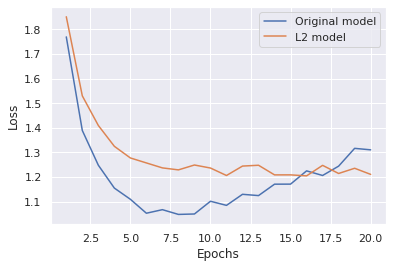

In [75]:
plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss5, label = 'L2 model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The original model appears to perform better as compared to the weight regularized model as the validation loss remains lower for the original model. 

# Using Dropout method

In [76]:
model6 = models.Sequential()
model6.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model6.add(layers.Dropout(0.1))
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.Dropout(0.1))
model6.add(layers.Dense(46, activation='softmax'))

model6.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['acc'])

history_model6 = model6.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))  

Epoch 1/20
16/16 [==============================] - 1s 54ms/step - loss: 2.6437 - acc: 0.5014 - val_loss: 1.7571 - val_acc: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4781 - acc: 0.6774 - val_loss: 1.3736 - val_acc: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1295 - acc: 0.7434 - val_loss: 1.2391 - val_acc: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.9235 - acc: 0.7894 - val_loss: 1.1715 - val_acc: 0.7320
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.7700 - acc: 0.8255 - val_loss: 1.1068 - val_acc: 0.7610
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6370 - acc: 0.8633 - val_loss: 1.0699 - val_acc: 0.7750
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5412 - acc: 0.8810 - val_loss: 1.0387 - val_acc: 0.7860
Epoch 8/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4598 - a

In [77]:
# Evaluate the model on the test set
results = model6.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.1764 - acc: 0.7894


The model after using the dropout rate of 0.1 is able to achieve an accuracy of 79.16% on the test set

Plotting training and validation loss

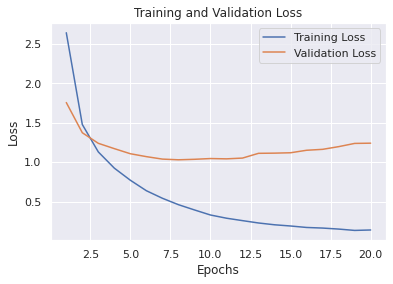

In [78]:
train_acc6  = history_model6.history['acc']
train_loss6 = history_model6.history['loss']
val_acc6  = history_model6.history['val_acc']
val_loss6 = history_model6.history['val_loss']

epochs = range(1, len(train_acc6) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss6, label = 'Training Loss')
plt.plot(epochs, val_loss6, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

After 2.5 epochs the difference between the training loss and the validation loss keeps on increasing indicating overfitting.

Comparing the dropout model to the original model

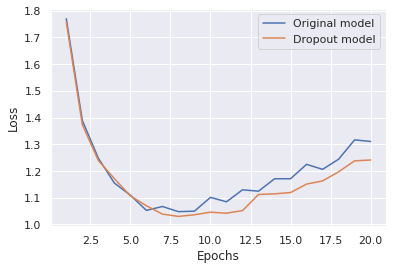

In [79]:
plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss6, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The dropout model does better on the validation loss as the loss is much lower than the original model. After 6 epochs the difference becomes more evident. 

Comparing different models

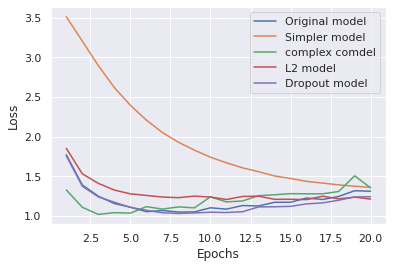

In [80]:
epochs = range(1, len(train_acc6) + 1)

plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss3, label = 'Simpler model')
plt.plot(epochs, val_loss4, label = 'complex comdel')
plt.plot(epochs, val_loss5, label = 'L2 model')
plt.plot(epochs, val_loss6, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The loss from L2 weight regularization model appears to be decreasing and becoming constant and not increasing after 11 epochs. When it comes to overfitting, the dropout model appears to be doing the best as it starts overfitting the last as we can see from the graph that the loss for it starts increasing after the highest number of epochs amongst the other models. 

The sharpest decline in the validation loss is for the simpler model with just 8 neurons making it unreliable.

Choosing a model 

We can create a model using L2 weight regularization on the first hidden layer and dropout method on the second hidden layer

In [81]:
model7 = models.Sequential()
model7.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dropout(0.1))
model7.add(layers.Dense(46, activation='softmax'))

model7.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['acc'])

history_model7 = model7.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))  

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.7022 - acc: 0.5040 - val_loss: 1.7993 - val_acc: 0.6650
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4975 - acc: 0.7052 - val_loss: 1.4510 - val_acc: 0.6980
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1659 - acc: 0.7684 - val_loss: 1.3278 - val_acc: 0.7320
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9861 - acc: 0.8084 - val_loss: 1.2576 - val_acc: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8510 - acc: 0.8395 - val_loss: 1.2155 - val_acc: 0.7640
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7547 - acc: 0.8641 - val_loss: 1.2224 - val_acc: 0.7660
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6751 - acc: 0.8830 - val_loss: 1.1603 - val_acc: 0.7850
Epoch 8/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6097 - a

In [82]:
# Evaluate the model on the test set
results = model7.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0926 - acc: 0.7858


The final model which uses l2 weight regularization on the first layer and dropout function on the second layer is able to achieve around 78.85% accuracy which is one of the highest amongst the models. 

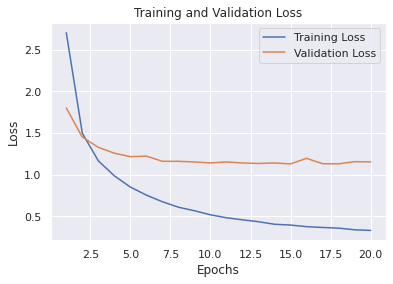

In [83]:
train_acc7  = history_model7.history['acc']
train_loss7 = history_model7.history['loss']
val_acc7  = history_model7.history['val_acc']
val_loss7 = history_model7.history['val_loss']

epochs = range(1, len(train_acc7) + 1)

plt.title(label = 'Training and Validation Loss')
plt.plot(epochs, train_loss7, label = 'Training Loss')
plt.plot(epochs, val_loss7, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

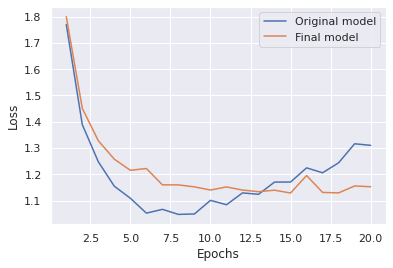

In [84]:
plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss7, label = 'Final model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

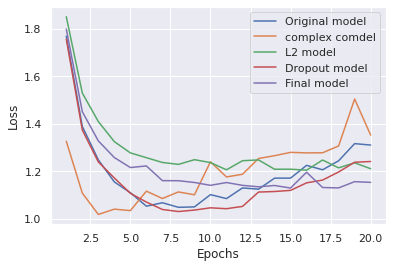

In [85]:
epochs = range(1, len(train_acc7) + 1)

plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss4, label = 'complex comdel')
plt.plot(epochs, val_loss5, label = 'L2 model')
plt.plot(epochs, val_loss6, label = 'Dropout model')
plt.plot(epochs, val_loss7, label = 'Final model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The Graph clearly shows that the final model has properties of both the l2 weight regularization and the dropout model as the validation loss decreases with each succesive epoch. The validation loss keeps on decreasing finally beocming the least after 20 epochs. 

The original model had an accuracy of around 77% whereas the final model has an accuracy of around 79%. 